In [1]:
# Name: Sarita Kukreti
# Email:sarukukreti11@gmail.com
# Date: 2/8/2021

In [2]:
# Importing the libraries
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 1.	Import a 311 NYC service request.

In [3]:
## Import module and Setting local file system directory
import io
%cd "E:\Simplilearn\Datasets\Customer Service Requests"

E:\Simplilearn\Datasets\Customer Service Requests


In [4]:
# Load 311 NYC ServiceRequests file
cust_service_req = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv', low_memory=False)

In [5]:
# View top 5 rows
cust_service_req.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [6]:
# Total no. of rows(observations) and columns(Variables)
cust_service_req.shape

(300698, 53)

In [7]:
# Data Preprocessing  - Cleaning up the data and make it ready for building Models

In [8]:
# Understanding Dataset
cust_service_req.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [9]:
# Changing columns name for easy access
cust_service_req.columns = cust_service_req.columns.str.replace(" ","_").str.lower()

In [10]:
# printing the columns
cust_service_req.columns

Index(['unique_key', 'created_date', 'closed_date', 'agency', 'agency_name',
       'complaint_type', 'descriptor', 'location_type', 'incident_zip',
       'incident_address', 'street_name', 'cross_street_1', 'cross_street_2',
       'intersection_street_1', 'intersection_street_2', 'address_type',
       'city', 'landmark', 'facility_type', 'status', 'due_date',
       'resolution_description', 'resolution_action_updated_date',
       'community_board', 'borough', 'x_coordinate_(state_plane)',
       'y_coordinate_(state_plane)', 'park_facility_name', 'park_borough',
       'school_name', 'school_number', 'school_region', 'school_code',
       'school_phone_number', 'school_address', 'school_city', 'school_state',
       'school_zip', 'school_not_found', 'school_or_citywide_complaint',
       'vehicle_type', 'taxi_company_borough', 'taxi_pick_up_location',
       'bridge_highway_name', 'bridge_highway_direction', 'road_ramp',
       'bridge_highway_segment', 'garage_lot_name', 'ferry_

In [11]:
# list of empty columns name given in data description they are of no use so we have to delete these
empty_cols = ['landmark','school_not_found','school_or_citywide_complaint','vehicle_type',
 'taxi_company_borough','taxi_pick_up_location','bridge_highway_name','bridge_highway_direction',
 'road_ramp','bridge_highway_segment','garage_lot_name','ferry_direction','ferry_terminal_name',]

unspecified_cols =['park_facility_name','school_name','school_number','school_region',
 'school_code','school_phone_number','school_address','school_city',
 'school_state','school_zip',]

# Deleteing both Empty Columns and Unspecified columns from data frame
cust_service_req= cust_service_req.drop(empty_cols, axis=1)
cust_service_req= cust_service_req.drop(unspecified_cols, axis=1)
cust_service_req.shape

(300698, 30)

In [12]:
# Location with lat long info already avaiable in Lattitude and Longtitude. Deleting location from data frame
cust_service_req= cust_service_req.drop(['latitude','longitude'], axis=1)
cust_service_req.shape

(300698, 28)

In [13]:
# Removing Column 'Unique Key' which doesnt have any significance in analytics model
cust_service_req = cust_service_req.drop(['unique_key'],axis=1)

In [14]:
# Now we have to identify columns which has null or empty or single value and these columns will not have
# any significance while processing model
single_value = []
for i in cust_service_req.columns:
    if len(cust_service_req[i].value_counts()) ==1:
        single_value.append(i)
        print('Columns has single value ', single_value)
        
#Deleting single value columns from dataframe
cust_service_req= cust_service_req.drop(single_value, axis=1)

Columns has single value  ['agency']
Columns has single value  ['agency', 'facility_type']


In [15]:
# Checking columns which has more than 70% data is null or empty and doesnt have any impact of analytics.
cust_service_req.isnull().sum().sort_values(ascending=False)

intersection_street_2             257336
intersection_street_1             256840
cross_street_2                     49779
cross_street_1                     49279
incident_address                   44410
street_name                        44410
descriptor                          5914
y_coordinate_(state_plane)          3540
x_coordinate_(state_plane)          3540
location                            3540
address_type                        2815
incident_zip                        2615
city                                2614
resolution_action_updated_date      2187
closed_date                         2164
location_type                        131
due_date                               3
status                                 0
resolution_description                 0
community_board                        0
borough                                0
complaint_type                         0
agency_name                            0
park_borough                           0
created_date    

In [16]:
cust_service_req.shape

(300698, 25)

In [17]:
# Above cell listed Intersection Street 2 and Intersection Street 1 has more than 70% data null and these columns
# doesnt have much impact on analytics model building.
# dropping these columns
cust_service_req =cust_service_req.drop(['intersection_street_1','intersection_street_2'],axis=1)
cust_service_req.shape

(300698, 23)

In [18]:
cust_service_req.dtypes

created_date                       object
closed_date                        object
agency_name                        object
complaint_type                     object
descriptor                         object
location_type                      object
incident_zip                      float64
incident_address                   object
street_name                        object
cross_street_1                     object
cross_street_2                     object
address_type                       object
city                               object
status                             object
due_date                           object
resolution_description             object
resolution_action_updated_date     object
community_board                    object
borough                            object
x_coordinate_(state_plane)        float64
y_coordinate_(state_plane)        float64
park_borough                       object
location                           object
dtype: object

In [19]:
# these columns represented in float64 format but these are more categorized data than numerical
# hence converting these columns as object columns
cust_service_req=cust_service_req.astype(
    {'incident_zip':'str','x_coordinate_(state_plane)':'str','y_coordinate_(state_plane)':'str'})

In [20]:
# All columns are in object format
cust_service_req.dtypes

created_date                      object
closed_date                       object
agency_name                       object
complaint_type                    object
descriptor                        object
location_type                     object
incident_zip                      object
incident_address                  object
street_name                       object
cross_street_1                    object
cross_street_2                    object
address_type                      object
city                              object
status                            object
due_date                          object
resolution_description            object
resolution_action_updated_date    object
community_board                   object
borough                           object
x_coordinate_(state_plane)        object
y_coordinate_(state_plane)        object
park_borough                      object
location                          object
dtype: object

In [21]:
# Convert string data to upper case to make model case insentive
for col in cust_service_req.columns:
    cust_service_req[col] = cust_service_req[col].str.upper()
    
cust_service_req.head()

,created_date,closed_date,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,...,status,due_date,resolution_description,resolution_action_updated_date,community_board,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),park_borough,location
0,12/31/2015 11:59:45 PM,01-01-16 0:55,NEW YORK CITY POLICE DEPARTMENT,NOISE - STREET/SIDEWALK,LOUD MUSIC/PARTY,STREET/SIDEWALK,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,...,CLOSED,01-01-16 7:59,THE POLICE DEPARTMENT RESPONDED AND UPON ARRIV...,01-01-16 0:55,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,MANHATTAN,"(40.86568153633767, -73.92350095571744)"
1,12/31/2015 11:59:44 PM,01-01-16 1:26,NEW YORK CITY POLICE DEPARTMENT,BLOCKED DRIVEWAY,NO ACCESS,STREET/SIDEWALK,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,...,CLOSED,01-01-16 7:59,THE POLICE DEPARTMENT RESPONDED TO THE COMPLAI...,01-01-16 1:26,01 QUEENS,QUEENS,1007766.0,221986.0,QUEENS,"(40.775945312321085, -73.91509393898605)"
2,12/31/2015 11:59:29 PM,01-01-16 4:51,NEW YORK CITY POLICE DEPARTMENT,BLOCKED DRIVEWAY,NO ACCESS,STREET/SIDEWALK,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,...,CLOSED,01-01-16 7:59,THE POLICE DEPARTMENT RESPONDED AND UPON ARRIV...,01-01-16 4:51,07 BRONX,BRONX,1015081.0,256380.0,BRONX,"(40.870324522111424, -73.88852464418646)"
3,12/31/2015 11:57:46 PM,01-01-16 7:43,NEW YORK CITY POLICE DEPARTMENT,ILLEGAL PARKING,COMMERCIAL OVERNIGHT PARKING,STREET/SIDEWALK,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,...,CLOSED,01-01-16 7:57,THE POLICE DEPARTMENT RESPONDED TO THE COMPLAI...,01-01-16 7:43,10 BRONX,BRONX,1031740.0,243899.0,BRONX,"(40.83599404683083, -73.82837939584206)"
4,12/31/2015 11:56:58 PM,01-01-16 3:24,NEW YORK CITY POLICE DEPARTMENT,ILLEGAL PARKING,BLOCKED SIDEWALK,STREET/SIDEWALK,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,...,CLOSED,01-01-16 7:56,THE POLICE DEPARTMENT RESPONDED AND UPON ARRIV...,01-01-16 3:24,04 QUEENS,QUEENS,1019123.0,206375.0,QUEENS,"(40.733059618956815, -73.87416975810375)"


In [22]:
# Due Date and Resolution Action Updated Date cannot be less than Created Date. Filling Null column value with Created Date
cust_service_req['due_date']=cust_service_req['due_date'].fillna(cust_service_req['created_date'])
cust_service_req['resolution_action_updated_date']=cust_service_req[
    'resolution_action_updated_date'].fillna(cust_service_req['created_date'])

In [23]:
# Filling null columns of object columns with max occurance item value
for col in cust_service_req:
    cust_service_req[col]=cust_service_req[col].fillna(
        cust_service_req[col].value_counts().idxmax())
    
# Check is there any null cells present in Dataframe
cust_service_req.isnull().sum().sort_values()

created_date                      0
y_coordinate_(state_plane)        0
x_coordinate_(state_plane)        0
borough                           0
community_board                   0
resolution_action_updated_date    0
resolution_description            0
due_date                          0
status                            0
city                              0
park_borough                      0
address_type                      0
cross_street_1                    0
street_name                       0
incident_address                  0
incident_zip                      0
location_type                     0
descriptor                        0
complaint_type                    0
agency_name                       0
closed_date                       0
cross_street_2                    0
location                          0
dtype: int64

In [24]:
# Converting all the date columns from str object column to datetime object column
date_cols =['created_date', 'closed_date','due_date','resolution_action_updated_date']
for col in date_cols:
    cust_service_req[col] = pd.to_datetime(cust_service_req[col])

In [25]:
#'created_date', 'closed_date','due_date','resolution_action_updated_date' converted to datetime
cust_service_req.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   created_date                    300698 non-null  datetime64[ns]
 1   closed_date                     300698 non-null  datetime64[ns]
 2   agency_name                     300698 non-null  object        
 3   complaint_type                  300698 non-null  object        
 4   descriptor                      300698 non-null  object        
 5   location_type                   300698 non-null  object        
 6   incident_zip                    300698 non-null  object        
 7   incident_address                300698 non-null  object        
 8   street_name                     300698 non-null  object        
 9   cross_street_1                  300698 non-null  object        
 10  cross_street_2                  300698 non-null  object 

In [26]:
cust_service_req.status.value_counts()

CLOSED      298471
OPEN          1439
ASSIGNED       786
DRAFT            2
Name: status, dtype: int64

In [27]:
closed_status_requests = cust_service_req[cust_service_req['status']=='CLOSED']
non_closed_status_requests = cust_service_req[cust_service_req['status']!='CLOSED']
open_status_requests = cust_service_req[cust_service_req['status']=='OPEN']
assigned_status_requests = cust_service_req[cust_service_req['status']=='ASSIGNED']
draft_status_requests = cust_service_req[cust_service_req['status']=='DRAFT']
print('Closed requests',closed_status_requests.shape)
print('Not closed requests (OPEN|ASSIGNED|DRAFT)', non_closed_status_requests.shape)
print('Open requests',open_status_requests.shape)
print('Assigned requests',assigned_status_requests.shape)
print('Drafted requests',draft_status_requests.shape)

Closed requests (298471, 23)
Not closed requests (OPEN|ASSIGNED|DRAFT) (2227, 23)
Open requests (1439, 23)
Assigned requests (786, 23)
Drafted requests (2, 23)


In [28]:
#Function to range classify observations based on Request_Closing_Time for CLOSED status requests
def segregate_duration(duration):
    if duration <=60:
        return "00-1 Hrs"
    elif duration >60 and duration<= 120:
        return "1-2 Hrs"
    elif duration >120 and duration<= 240:
        return "2-4 Hrs"
    elif duration >240 and duration<= 480:
        return "4-8 Hrs"
    elif duration >480 and duration< 960:
        return "8-16 Hrs"
    elif duration >960 and duration< 1440:
        return "16- 24 Hrs"
    elif duration >1440 and duration< 2880:
        return "1-2 Days"
    elif duration >2880 and duration< 5760:
        return "2-4 Days"
    elif duration >5760 and duration< 11520:
        return "4-8 Days"
    elif duration >11520 :
        return "More than 8 Days"

#### 2.	Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. (Hint: Explore the package/module datetime)

In [29]:
print('Both Created Date and Closed Date is available for closed CSRs')
closed_status_requests['Request_Closing_Time']=0
closed_status_requests['Resolved_Duration_Grp']=''
closed_status_requests['Closed-MM-YYYY']=''
for index, csr in closed_status_requests.iterrows():
    Request_Closing_Time = int(((csr['closed_date']-csr['created_date']).total_seconds())/60)
    closed_status_requests.at[index,'Request_Closing_Time'] = Request_Closing_Time
    closed_status_requests.at[index,'Resolved_Duration_Grp'] = segregate_duration(Request_Closing_Time)

Both Created Date and Closed Date is available for closed CSRs


<ipython-input-29-85b63faaf984>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed_status_requests['Request_Closing_Time']=0
<ipython-input-29-85b63faaf984>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed_status_requests['Resolved_Duration_Grp']=''
<ipython-input-29-85b63faaf984>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [30]:
closed_status_requests.head()

,created_date,closed_date,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,...,resolution_action_updated_date,community_board,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),park_borough,location,Request_Closing_Time,Resolved_Duration_Grp,Closed-MM-YYYY
0,2015-12-31 23:59:45,2016-01-01 00:55:00,NEW YORK CITY POLICE DEPARTMENT,NOISE - STREET/SIDEWALK,LOUD MUSIC/PARTY,STREET/SIDEWALK,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,...,2016-01-01 00:55:00,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,MANHATTAN,"(40.86568153633767, -73.92350095571744)",55,00-1 Hrs,
1,2015-12-31 23:59:44,2016-01-01 01:26:00,NEW YORK CITY POLICE DEPARTMENT,BLOCKED DRIVEWAY,NO ACCESS,STREET/SIDEWALK,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,...,2016-01-01 01:26:00,01 QUEENS,QUEENS,1007766.0,221986.0,QUEENS,"(40.775945312321085, -73.91509393898605)",86,1-2 Hrs,
2,2015-12-31 23:59:29,2016-01-01 04:51:00,NEW YORK CITY POLICE DEPARTMENT,BLOCKED DRIVEWAY,NO ACCESS,STREET/SIDEWALK,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,...,2016-01-01 04:51:00,07 BRONX,BRONX,1015081.0,256380.0,BRONX,"(40.870324522111424, -73.88852464418646)",291,4-8 Hrs,
3,2015-12-31 23:57:46,2016-01-01 07:43:00,NEW YORK CITY POLICE DEPARTMENT,ILLEGAL PARKING,COMMERCIAL OVERNIGHT PARKING,STREET/SIDEWALK,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,...,2016-01-01 07:43:00,10 BRONX,BRONX,1031740.0,243899.0,BRONX,"(40.83599404683083, -73.82837939584206)",465,4-8 Hrs,
4,2015-12-31 23:56:58,2016-01-01 03:24:00,NEW YORK CITY POLICE DEPARTMENT,ILLEGAL PARKING,BLOCKED SIDEWALK,STREET/SIDEWALK,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,...,2016-01-01 03:24:00,04 QUEENS,QUEENS,1019123.0,206375.0,QUEENS,"(40.733059618956815, -73.87416975810375)",207,2-4 Hrs,


#### 3.	Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.

###### 1) Most frequent Complaints - Top 5 

<AxesSubplot:title={'center':'Most Common Complaints'}>

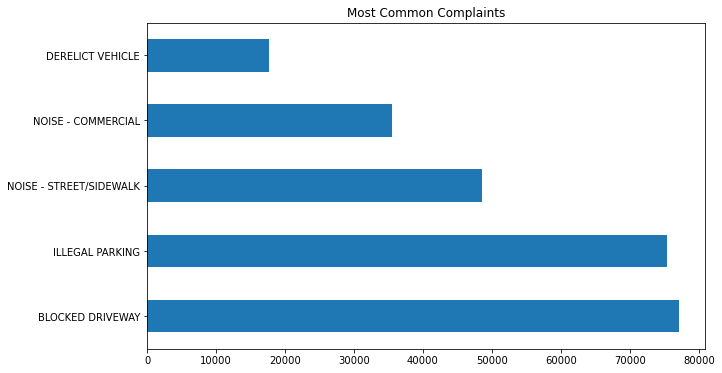

In [31]:
# 1. Most frequent Complaints - Top 5
(cust_service_req['complaint_type'].value_counts()).head().plot(kind='barh',
                    figsize=(10,6), title = 'Most Common Complaints')

<b>Comment: </b> This graph shows that Blocked Driveway and Illegal Parking are the common complaints

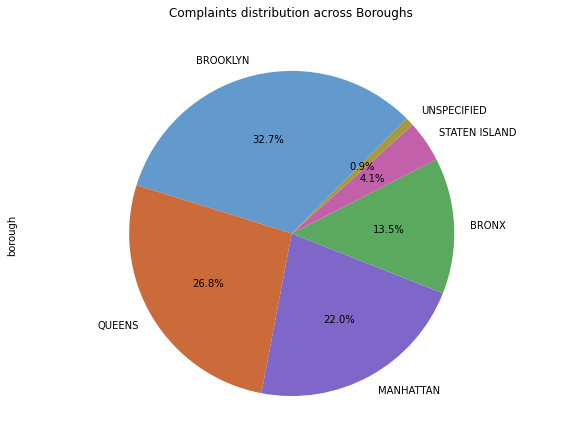

In [32]:
#2. complaints distribution across Boroughs
colors = ['#639ace','#ca6b39','#7f67ca','#5ba85f','#c360aa','#a7993f','#cc566a']
cust_service_req['borough'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                        startangle=45, colors = colors,
                        figsize = (8,6))
plt.axis('equal')
plt.title('Complaints distribution across Boroughs\n\n')
plt.tight_layout()
plt.show()

<b>Comment:</b>This Conclusion indicates that Brooklyn has more complaints with (32.7%) and after that Queens (26.8%)


In [33]:
# 3. Analysis for Brooklyn borough which has highest number of complains
Brooklyn_df = cust_service_req[cust_service_req['borough']=='BROOKLYN']

<AxesSubplot:title={'center':'Most Frequent Complaints in Brooklyn'}>

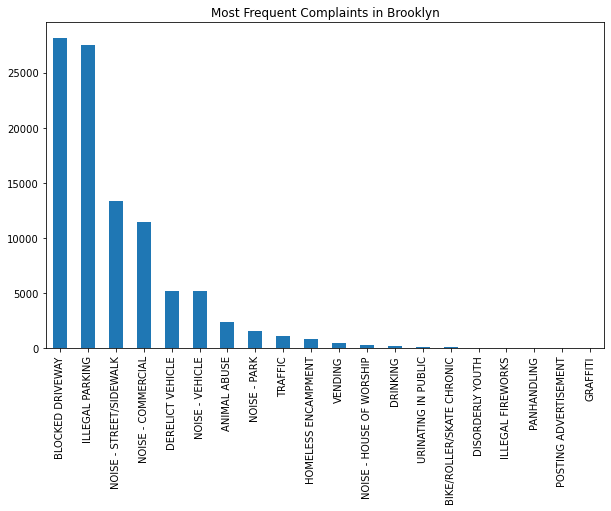

In [34]:
(Brooklyn_df['complaint_type'].value_counts()).head(25).plot(kind='bar',
      figsize=(10,6),title = 'Most Frequent Complaints in Brooklyn')

<b>Comment: </b>Blocked Driveway and Illegal Parking is the Most Frequent Complaints in Brooklyn

<AxesSubplot:title={'center':'Location Type vs # Complaints'}>

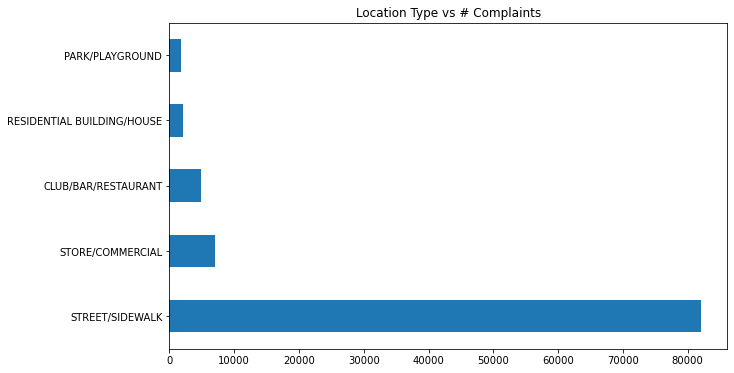

In [35]:
# 4.location type vs complaints
(Brooklyn_df['location_type'].value_counts()).head().plot(kind='barh',
                                                    figsize=(10,6),title = 'Location Type vs # Complaints')

<b>Comment: </b>Street/Sidewalk has more complaints

<AxesSubplot:>

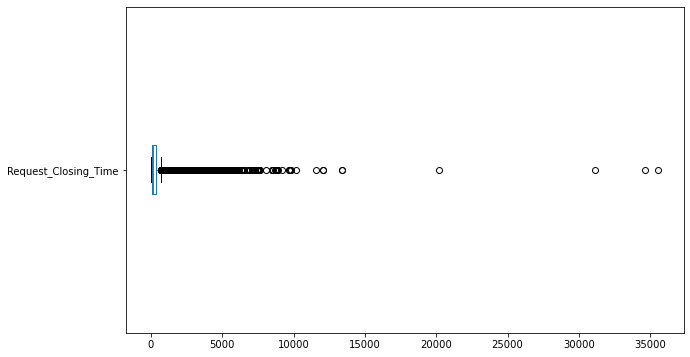

In [36]:
# There are some outliers that means some of the requests taken longer time than the avg resolution time
closed_status_requests.Request_Closing_Time.plot(kind='box', vert=False, figsize=(10,6))

#### 4.	Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations. 

In [37]:
order_data= closed_status_requests.groupby(['city','complaint_type']).Request_Closing_Time.mean()
df = order_data.to_frame()
df = df.sort_values(by=['city','Request_Closing_Time'],ascending=False)
df.shape

(747, 1)

In [38]:
#Storing the sorted results
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df)

                                               Request_Closing_Time
city                complaint_type                                 
WOODSIDE            BIKE/ROLLER/SKATE CHRONIC            728.500000
                    DERELICT VEHICLE                     560.562249
                    GRAFFITI                             539.333333
                    ANIMAL ABUSE                         506.101449
                    VENDING                              437.800000
                    ILLEGAL PARKING                      422.168517
                    NOISE - PARK                         404.710526
                    HOMELESS ENCAMPMENT                  402.696970
                    NOISE - COMMERCIAL                   398.445498
                    NOISE - STREET/SIDEWALK              393.329412
                    BLOCKED DRIVEWAY                     388.239063
                    URINATING IN PUBLIC                  385.125000
                    NOISE - VEHICLE             

#### 5.	Perform a statistical test for the following: 

###### 5.a. Whether the average response time across complaint types is similar or not (overall) 

In [39]:
# Here complaint type is categorical data and response time is numerical data.
#Hence, null hypothesis should be calculated using f_onway or anova
closed_status_requests.Request_Closing_Time.groupby(closed_status_requests['complaint_type']).mean()
#Mean of response time based on Complaint type

complaint_type
AGENCY ISSUES                  315.333333
ANIMAL ABUSE                   312.512490
ANIMAL IN A PARK             20210.000000
BIKE/ROLLER/SKATE CHRONIC      225.693396
BLOCKED DRIVEWAY               284.142643
DERELICT VEHICLE               441.499119
DISORDERLY YOUTH               213.167832
DRINKING                       231.391373
GRAFFITI                       428.752212
HOMELESS ENCAMPMENT            261.000907
ILLEGAL FIREWORKS              165.470238
ILLEGAL PARKING                269.724982
NOISE - COMMERCIAL             188.524159
NOISE - HOUSE OF WORSHIP       191.287406
NOISE - PARK                   204.239741
NOISE - STREET/SIDEWALK        206.425917
NOISE - VEHICLE                215.039220
PANHANDLING                    262.072131
POSTING ADVERTISEMENT          118.262751
SQUEEGEE                       242.500000
TRAFFIC                        206.695526
URINATING IN PUBLIC            217.302365
VENDING                        240.542578
Name: Request_Closi

In [40]:
# Import anova
from scipy.stats import f_oneway

In [41]:
result = closed_status_requests.groupby('complaint_type')['Request_Closing_Time'].apply(list)
f_oneway(*result)

F_onewayResult(statistic=513.9606866025152, pvalue=0.0)

In [42]:
# Since pvalue = 0.0 is less than 0.05, Reject Null

# Null - No Significant difference in average request closing time by complaint type
# Alt - Significant difference in average request closing time by complaint type
# Conclusion: Reject_null There is relationship between avg response time for each complaint type.
# Response times will change for based on complaint type

###### 5.b. Are the type of complaint or service requested and location related?

In [43]:
# Both complaint type and locations are categorical data. Hence p score should be caluclated using chi2_contingency
# Import chi2_contigency module
from scipy.stats import chi2_contingency

In [44]:
chi2_contingency(pd.crosstab(closed_status_requests['complaint_type'], closed_status_requests['city']))


(119069.84639856996,
 0.0,
 1034,
 array([[4.42254021e-03, 1.41641902e-01, 2.45048933e-02, ...,
         2.20724962e-02, 4.94922455e-02, 7.36352946e-02],
        [5.72424122e+00, 1.83331835e+02, 3.17175002e+01, ...,
         2.85691675e+01, 6.40594631e+01, 9.53086162e+01],
        [7.37090036e-04, 2.36069836e-02, 4.08414888e-03, ...,
         3.67874936e-03, 8.24870758e-03, 1.22725491e-02],
        ...,
        [3.31174553e+00, 1.06066177e+02, 1.83500809e+01, ...,
         1.65286209e+01, 3.70614432e+01, 5.51405631e+01],
        [4.36357301e-01, 1.39753343e+01, 2.41781614e+00, ...,
         2.17781962e+00, 4.88323489e+00, 7.26534906e+00],
        [2.79578250e+00, 8.95412888e+01, 1.54911767e+01, ...,
         1.39534963e+01, 3.12873478e+01, 4.65497787e+01]]))

In [45]:
# Since pvalue = 0.0 is less than 0.05, Reject Null
# Null - No Significant difference in city and complaint type
# Alt - Significant difference in city and complaint type
# Conclusion: Reject null, means There is relationship between complaint type location of issue reported